In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../../nuclearpy_models')

In [2]:
from models.BE import dz_be, semf_be
from utils.metrics import RegressionMetrics

In [3]:
exp_df = pd.read_csv('../../Data/Experimental/be_exp.csv', delimiter=',')


## Inference

In [4]:
dz_be(63, 90)

1258.7741561571124

In [5]:
exp_df.sample()[['N', 'Z', 'BE']]

,N,Z,BE
2158,75,54,1087.649362


In [6]:
exp_df["semf_pred"] = exp_df.apply(lambda x: semf_be(x["Z"], x["N"]), axis=1)
exp_df["dz_pred"] = exp_df.apply(lambda x: dz_be(x["Z"], x["N"]), axis=1)

# Regression Metrics

In [7]:
semf_metrics = RegressionMetrics(exp_df["BE"], exp_df["semf_pred"], "SEMF")()
dz_metrics = RegressionMetrics(exp_df["BE"], exp_df["dz_pred"], "DZ")()
pd.concat([semf_metrics, dz_metrics], axis=0)

,R2,MSE,RMSE,MAE,MAPE,RMSPE,Max Error,Explained Variance Score
SEMF,0.999916,17.463550,4.178941,2.978731,0.401497,0.873391,20.136952,0.999918
DZ,0.999992,1.580478,1.257171,0.822816,0.096232,0.185628,6.797186,0.999993


In [8]:
(np.abs(exp_df["BE"] - exp_df["dz_pred"]) < np.abs(exp_df["BE"] - exp_df["semf_pred"])).sum()

4094

In [9]:
import seaborn as sns

<Axes: xlabel='N', ylabel='Z'>

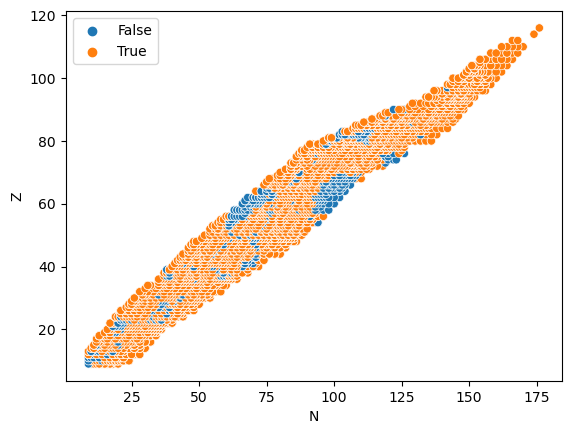

In [10]:
sns.scatterplot(x="N", y="Z", data=exp_df, hue=(np.abs(exp_df["BE"] - exp_df["dz_pred"]) < np.abs(exp_df["BE"] - exp_df["semf_pred"])))